# 2 - Damping

# 2.1 - Introduction

In this notebook we describe a simple method for reduction of reflections at the computational boundaries of the domain $\Omega$ when we simulate the acoustic wave equation. This method, called *Damping*, has been proposed by Sochaki. It adds a damping term, modifying the original wave equation at a boundary layer. We saw in the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a> that the (artificial) wave reflections on the computational boundaries lead to a very noisy solution of the acoustic problem. 

We describe this method in the next Sections, omitting information already discussed in the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a>, highlighting  only the new elements necessary to apply Damping.

# 2.2 - Acoustic Problem with Damping

We define an extension of the spatial domain $\Omega=\left[x_{I}-L_{x},x_{F}+L_{x}\right] \times\left[z_{I},z_{F}+L_{z}\right]$, in which we added an *absorption region* to the previous spatial domain
$\Omega_{0}=\left[x_{I},x_{F}\right]\times\left[z_{I},z_{F}\right]$.  
The *absorption region* is composed by two bands of length $L_{x}$ at the beginning and end of the domain in the direction $x$ and of a band of length $L_{z}$ at the end of the domain in the $z$ direction. Again, $\partial\Omega$ denotes the boundary of $\Omega$. The figure below shows the extended domain $\Omega$, with the absorption region highlighted in blue.

<img src='domain2.png' width=500>

The damping acoustic problem equation is given by:

\begin{equation}
u_{tt}(x,z,t)+c^2(x,z)\zeta(x,z)u_t(x,z,t)-c^2(x,z)\Delta(u(x,z,t))=c^2(x,z)f(x,z,t),
\end{equation}

where $u(x,z,t)$, $f(x,z,t)$ and $c(x,z)$ are as before. The wave equation has been modified by the introduction of the damping term $c^2(x,z)\zeta(x,z)u_t(x,z,t)$, where $\zeta$ is different from zero only in the absorption region, growing smoothly along the absorption bands from zero to its maximum at the outer boundary. The actual form of
$\zeta$ used in this notebook will be given ahead. We still use the same initial conditions

\begin{equation}
u(x,z,0) = 0.0 \hspace{.5cm} \mbox{ and } \hspace{.5cm} u_t(x,z,0)= 0.0.
\end{equation}

and Dirichlet null boundary conditions at the (outer) bottom and lateral boundaries. At the surface we
use a zero Neumman boundary condition.

The source term and the velocity field are defined as before.

# 2.3 - Finite Difference Operators and Discretization of Spatial and Temporal Domains

The only difference with respect to the discretization used in the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a> is the extra damping term. The temporal derivative of $u$ is approximated by a centered difference:
$$ u_t(x_i,z_j,t_k) = \frac{u_{i,j,k+1}-u_{i,j,k-1}}{2\Delta t} $$. All the other terms are discretized as before.


# 2.4 - Standard Problem

Redeeming the Standard Problem definitions discussed on the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a> we have that:

- $x_{I}$ =  0.0 Km;
- $x_{F}$ =  1.0 Km = 1000 m;
- $z_{I}$ =  0.0 Km;
- $z_{F}$ =  1.0 Km = 1000 m;
- $L_x$ and $L_z$ will be defined ahead;

The spatial discretization parameters are given by:
- $\Delta x$ = 0.01 km = 10m;
- $\Delta z$ = 0.01 km = 10m;

Let's consider a $I$ the time domain with the following limitations:

- $t_{I}$ = 0 s = 0 ms;
- $t_{F}$ = 1 s = 1000 ms;

The temporal discretization parameters are given by:

- $\Delta t$ $\approx$ 0.0016 s = 1.6 ms;
- $NT$ = 626.

With respect to the $f(x,z,t)$ external force term, we will consider a Ricker source with the following properties:

- Position at $x:$ $\bar{x} = 500 m =  0.5 Km$;
- Position at $z:$ $\bar{z} =  10 m = 0.01 Km$;
- Peak frequency: $f_{0} = 10 Hz = 0.01 Khz$;

The graph of $f(\bar{x},\bar{z},t)$ will be generated when building the code. We will use a velocity profile $c(x, z)$ with the following properties:

- Minimum propagation velocity: $v_{min} = 1500 m/s = 1,5 Km/s$;
- Maximum propagation velocity: $v_{max} = 2500 m/s = 2,5 Km/s$;

The figure of the velocity profile will be generated when building the code. We introduce receivers along the $x$ direction, that is, at all discrete points between $0.0$ Km and $1.0$ Km , at depth $z=0.01$ Km to generate the seismogram.

# 2.5 - Damping Functions

Sochaki proposed various forms for the damping function $\zeta$, including linear, cubic or exponential functions. In general, the damping functions have a similar characteristic: they are zero in the "interior" domain $\Omega_{0}$ and increase toward the outer boundary $\partial\Omega$. 

Our particular damping function will be chosen as follows.
 We define the pair of functions $\zeta_{1}(x,z)$ and $\zeta_{2}(x,z)$ given, respectively, by:

\begin{equation}
\zeta_{1}(x,z)=\left\{ \begin{array}{ll}
0, & \textrm{if $x\in \left(x_{I},x_{F}\right)$,}\\ \bar{\zeta}_{1}(x,z)\left(\displaystyle\frac{\vert x-x_{I} \vert}{L_{x}}-\displaystyle\frac{1}{2\pi}\sin\left(\displaystyle\frac{2\pi\vert x-x_{I} \vert}{L_{x}}\right)\right) , & \textrm{if $x_{I}-L_{x}\leq x \leq x_{I}$,}\\ \bar{\zeta}_{1}(x,z)\left(\displaystyle\frac{\vert x-x_{F} \vert}{L_{x}}-\displaystyle\frac{1}{2\pi}\sin\left(\displaystyle\frac{2\pi\vert x-x_{F} \vert}{L_{x}}\right)\right) , & \textrm{if $x_{F}\leq x \leq x_{F}+L_{x}$.}\end{array}\right.
\end{equation}  

\begin{equation}
\zeta_{2}(x,z)=\left\{ \begin{array}{ll}
0, & \textrm{if $z\in \left(z_{I},z_{F}\right)$,} \\ \bar{\zeta}_{2}(x,z)\left(\displaystyle\frac{\vert z-z_{F} \vert}{L_{z}}-\displaystyle\frac{1}{2\pi}\sin\left(\displaystyle\frac{2\pi\vert z-z_{F} \vert}{L_{z}}\right)\right) , & \textrm{if $z_{F}\leq z \leq z_{F}+L_{z}$.}\end{array}\right.
\end{equation}  

Thus, we define the function $\zeta(x,z)$ as being the following function:

\begin{equation}
\zeta(x,z) = \displaystyle\frac{1}{v_{max}}\left(\displaystyle\frac{\zeta_{1}(x,z)}{\Delta x}+\displaystyle\frac{\zeta_{2}(x,z)}{\Delta z} \right) ,
\end{equation}

where $v_{max}$denotes the maximum velocity of propagation of $c(x,z)$. Below we display the shape of the function $\zeta_1(x,z)$ with $\bar{\zeta_{1}}(x,z)=0.26$ at the left band of the domain. It is similar at the other ones. The figures of the damping profiles will be generated when building the code.

# 2.6 - Numerical Simulations

In the numerical simulations we import the following Python and Devito packages:

In [1]:
# NBVAL_IGNORE_OUTPUT

import numpy                   as np
import matplotlib.pyplot       as plot
import math                    as mt
import matplotlib.ticker       as mticker    
from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   matplotlib              import cm

From Devito's library of examples we import the following structures:

In [2]:
# NBVAL_IGNORE_OUTPUT

%matplotlib inline
from   examples.seismic  import TimeAxis
from   examples.seismic  import RickerSource
from   examples.seismic  import Receiver
from   devito            import SubDomain, Grid, NODE, TimeFunction, Function, Eq, solve, Operator

The mesh parameters define the domain $\Omega_{0}$. The absorption region will be included bellow.

In [3]:
nptx   =  101
nptz   =  101
x0     =  0.
x1     =  1000. 
compx  =  x1-x0
z0     =  0.
z1     =  1000.
compz  =  z1-z0;
hxv    =  (x1-x0)/(nptx-1)
hzv    =  (z1-z0)/(nptz-1)

**Observation:** In this code we need to work with symbolic values and the real values of $\Delta x$ and $\Delta z$, then the numerica values of $\Delta x$ and $\Delta z$ are represented by *hxv* and *hzv*, respectively. The symbolic values of $\Delta x$ and $\Delta z$ will be given after.

In this case, we need to define the size of the bands $L_{x}$ and $L_{z}$ that extend the domain $\Omega_{0}$ for $\Omega$. The code that we will implement will build the values $L_{x}$ and $L_{z}$ from choosing a certain amount of points in each direction. Without loss of generality, we say that the size $L_{x}$ is such that:

- $L_{x}$ = npmlx*$\Delta x$;
- *0<npmlx<nptx;*

Similarly, we have $L_{z}$ such that:

- $L_{z}$ = npmlz*$\Delta z$;
- *0<npmlz<nptz*; 

So, we can explicitly define the lengths $L_{x}$ and $L_{z}$ depending on the number of points *npmlx* and *npmlz*. Thus, we choose these values as being:

In [4]:
npmlx  = 20
npmlz  = 20

And we define $L_{x}$ and $L_{z}$ as beeing:

In [5]:
lx = npmlx*hxv
lz = npmlz*hzv

Thus, from the *nptx* points, the first and the last *npmlx* points are in the absorption region of the *x* direction. Similarly, from the *nptz* points, the last *npmlz* points are in the absorption region of the *z* direction. Considering the construction of *grid*, we also have the following elements:

In [6]:
nptx    =  nptx + 2*npmlx
nptz    =  nptz + 1*npmlz
x0      =  x0 - hxv*npmlx
x1      =  x1 + hxv*npmlx
compx   =  x1-x0
z0      =  z0
z1      =  z1 + hzv*npmlz
compz   =  z1-z0
origin  = (x0,z0)
extent  = (compx,compz)
shape   = (nptx,nptz)
spacing = (hxv,hzv)

The $\zeta(x,z)$ function is non zero only in the blue region in the figure that represents the domain. In this way, the wave equation can be divided into 2 situations:

- In the region in blue:

\begin{equation}
u_{tt}(x,z,t)+c^2(x,z)\zeta(x,z)u_t(x,z,t)-c^2(x,z)^\Delta(u(x,z,t))=c^2(x,z)f(x,z,t),
\end{equation}

- In the white region:

\begin{equation}
u_{tt}(x,z,t)-c^2(x,z)^\Delta(u(x,z,t))=c^2(x,z)f(x,z,t),
\end{equation}

For this reason, we use the structure of the *subdomains* to represent the white region and the blue region.

**Observation:** Note that we can describe the blue region in different ways, that is, the way we choose here is not the only possible discretization for that region.

First, we define the white region, naming this region as *d0*, which is defined by the following pairs of points $(x,z)$:

- $x\in\{npmlx,nptx-npmlx\}$ and $z\in\{0,nptz-npmlz\}$.

In the language of *subdomains* *d0  it is written as:

In [7]:
class d0domain(SubDomain):
    name = 'd0'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('middle', npmlx, npmlx), z: ('middle', 0, npmlz)}
d0_domain = d0domain()

The blue region will be the union of the following regions:

- *d1* represents the left range in the direction *x*, where the pairs $(x,z)$ satisfy: $x\in\{0,npmlx\}$ and $z\in\{0,nptz\}$;
- *d2* represents the rigth range in the direction *x*, where the pairs $(x,z)$ satisfy: $x\in\{nptx-npmlx,nptx\}$ and $z\in\{0,nptz\}$;
- *d3* represents the left range in the direction *y*, where the pairs $(x,z)$ satisfy: $x\in\{npmlx,nptx-npmlx\}$ and $z\in\{nptz-npmlz,nptz\}$;

Thus, the regions *d1*, *d2* and *d3* are described as follows in the language of *subdomains*:

In [8]:
class d1domain(SubDomain):
    name = 'd1'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('left',npmlx), z: z}
d1_domain = d1domain()

class d2domain(SubDomain):
    name = 'd2'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('right',npmlx), z: z}
d2_domain = d2domain()

class d3domain(SubDomain):
    name = 'd3'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('middle', npmlx, npmlx), z: ('right',npmlz)}
d3_domain = d3domain()

The figure below represents the division of domains that we did previously:

<img src='domain2.png' width=500>

The advantage of dividing into regions is that the equations will be calculated where they actually operate and thus we gain computational efficiency, as we decrease the number of operations to be done. After defining the spatial parameters and constructing the *subdomains*, we set the *spatial grid* with the following command:

In [9]:
grid = Grid(origin=origin, extent=extent, shape=shape, subdomains=(d0_domain,d1_domain,d2_domain,d3_domain), dtype=np.float64)

Again, we use a velocity field given by a binary file. The reading and scaling of the velocity field for the Devito work units is done with the following commands:

In [10]:
v0 = np.zeros((nptx,nptz))                     
X0 = np.linspace(x0,x1,nptx)
Z0 = np.linspace(z0,z1,nptz)
    
x10 = x0+lx
x11 = x1-lx
        
z10 = z0
z11 = z1 - lz

xm = 0.5*(x10+x11)
zm = 0.5*(z10+z11)
        
pxm = 0
pzm = 0
        
for i in range(0,nptx):
    if(X0[i]==xm): pxm = i
            
for j in range(0,nptz):
    if(Z0[j]==zm): pzm = j
            
p0 = 0    
p1 = pzm
p2 = nptz
        
v0[0:nptx,p0:p1] = 1.5
v0[0:nptx,p1:p2] = 2.5

Previously we introduce the local variables *x10,x11,z10,z11,xm,zm,pxm* and *pzm* that help us to create a specific velocity field, where we consider the whole domain (including the absorpion region). Below we include a routine to plot the velocity field.

In [11]:
def graph2dvel(vel):
        plot.figure()
        plot.figure(figsize=(16,8))
        fscale =  1/10**(3)
        scale  = np.amax(vel[npmlx:-npmlx,0:-npmlz])
        extent = [fscale*(x0+lx),fscale*(x1-lx), fscale*(z1-lz), fscale*(z0)]
        fig = plot.imshow(np.transpose(vel[npmlx:-npmlx,0:-npmlz]), vmin=0.,vmax=scale, cmap=cm.seismic, extent=extent)
        plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.title('Velocity Profile')
        plot.grid()
        ax = plot.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plot.colorbar(fig, cax=cax, format='%.2e')
        cbar.set_label('Velocity [km/s]')
        plot.show()

Below we include the plot of velocity field.

<Figure size 576x432 with 0 Axes>

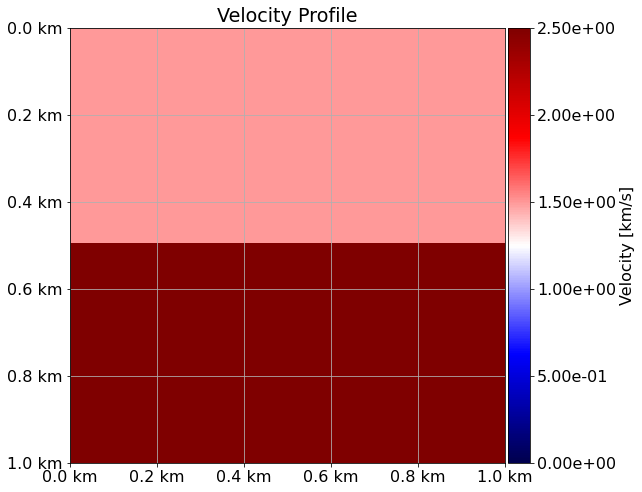

In [12]:
# NBVAL_IGNORE_OUTPUT

graph2dvel(v0)

Time parameters are defined and constructed by the following sequence of commands:

In [13]:
t0    = 0.
tn    = 1000.   
CFL   = 0.4
vmax  = np.amax(v0) 
dtmax = np.float64((min(hxv,hzv)*CFL)/(vmax))
ntmax = int((tn-t0)/dtmax)+1
dt0   = np.float64((tn-t0)/ntmax)

With the temporal parameters, we generate the time informations with *TimeAxis* as follows:

In [14]:
time_range = TimeAxis(start=t0,stop=tn,num=ntmax+1)
nt         = time_range.num - 1

The symbolic values associated with the spatial and temporal grids that are used in the composition of the equations are given by:

In [15]:
(hx,hz) = grid.spacing_map  
(x, z)  = grid.dimensions     
t       = grid.stepping_dim
dt      = grid.stepping_dim.spacing

We chose a single Ricker source, whose frequency is $ 0.005Khz $. This source is positioned at $\bar{x}$ = 35150m and $\bar{z}$ = 32m. We then defined the following variables that represents our choice:

In [16]:
f0      = 0.01
nsource = 1
xposf   = 0.5*(compx-2*npmlx*hxv)
zposf   = hzv

As we know, Ricker's source is generated by the *RickerSource* command. Using the parameters listed above, we generate and position the Ricker source with the following sequence of commands:

In [17]:
src = RickerSource(name='src',grid=grid,f0=f0,npoint=nsource,time_range=time_range,staggered=NODE,dtype=np.float64)
src.coordinates.data[:, 0] = xposf
src.coordinates.data[:, 1] = zposf

Below we include the plot of Ricker source.

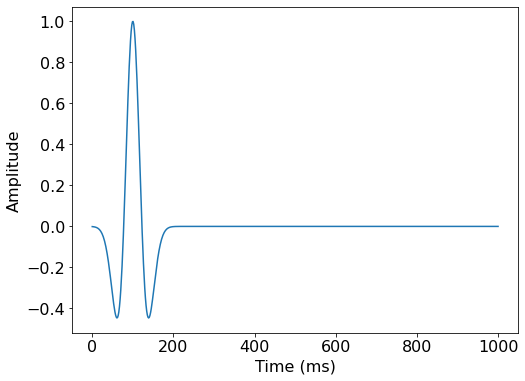

In [18]:
# NBVAL_IGNORE_OUTPUT

src.show()

With respect to receivers, the number of receivers is the same number of discrete points in the $x$ direction. So, we position these receivers along the direction $x$, at height $\bar{z}$ = 10m. In this way, our variables are chosen as:

In [19]:
nrec   = nptx
nxpos  = np.linspace(x0,x1,nrec)
nzpos  = hzv

As we know, receivers are generated by the command *Receiver*. Thus, we use the parameters listed above and using the *Receiver* command, we create and position the receivers:

In [20]:
rec = Receiver(name='rec',grid=grid,npoint=nrec,time_range=time_range,staggered=NODE,dtype=np.float64)
rec.coordinates.data[:, 0] = nxpos
rec.coordinates.data[:, 1] = nzpos

The displacement field *u* is a second order field in time and space, which uses points of type *non-staggered*. In this way, we construct the displacement field *u* with the command *TimeFunction*:

In [21]:
u = TimeFunction(name="u",grid=grid,time_order=2,space_order=2,staggered=NODE,dtype=np.float64)

The velocity field, the source term and receivers are defined as in the previous notebook: 

In [22]:
vel0 = Function(name="vel0",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
vel0.data[:,:] = v0[:,:]

In [23]:
src_term = src.inject(field=u.forward,expr=src*dt**2*vel0**2)

In [24]:
rec_term = rec.interpolate(expr=u)

The next step is to create the sequence of structures that reproduce the function $\zeta(x,z)$. Initially, we define the region $\Omega_{0}$, since the damping function uses the limits of that region. We previously defined the limits of the $\Omega$ region to be *x0*, *x1*, *z0* and *z1*. Now, we define the limits of the region $\Omega_{0}$ as: *x0pml* and *x1pml* in the direction $x$ and *z0pml* and *z1pml* in the direction $z$. These points satisfy the following relationships with the lengths $L_{x}$ and $L_{z}$:

- x0pml = x0 + $L_{x}$;
- x1pml = x1 - $L_{x}$;
- z0pml = z0;
- z1pml = z1 - $L_{z}$;

In terms of program variables, we have the following definitions:

In [25]:
x0pml  = x0 + npmlx*hxv 
x1pml  = x1 - npmlx*hxv 
z0pml  = z0            
z1pml  = z1 - npmlz*hzv 

Having built the $\Omega$ limits, we then create a function, which we will call *fdamp*, which computationally represents the $\zeta(x,z)$ function. In the *fdamp* function, we highlight the following elements:

- *quibar* represents a constant choice for $\bar{\zeta_{1}}(x,z)$ and $\bar{\zeta_{2}}(x,z)$, satisfying $\bar{\zeta_{1}}(x,z)=\bar{\zeta_{2}}(x,z)$;
- *adamp* denotes the function $\zeta_{1}(x,z)$;
- *bdamp* denotes the function $\zeta_{2}(x,z)$;
- The terms *a* and *b* locate the $(x,z)$ points that are passed as an argument to the *fdamp* function.

The *fdamp* function is defined using the following structure:

In [26]:
def fdamp(x,z):

    quibar  = 1.5*np.log(1.0/0.001)/(40)
    cte     = 1./vmax
   
    a = np.where(x<=x0pml,(np.abs(x-x0pml)/lx),np.where(x>=x1pml,(np.abs(x-x1pml)/lx),0.))
    b = np.where(z<=z0pml,(np.abs(z-z0pml)/lz),np.where(z>=z1pml,(np.abs(z-z1pml)/lz),0.))
    adamp = quibar*(a-(1./(2.*np.pi))*np.sin(2.*np.pi*a))/hxv
    bdamp = quibar*(b-(1./(2.*np.pi))*np.sin(2.*np.pi*b))/hzv
    fdamp = cte*(adamp+bdamp)

    return fdamp

Created the damping function, we define an array that loads the damping information in the entire domain $\Omega$. The objective is to assign this array to a *Function* and use it in the composition of the equations. To generate this array, we will use the function *generatemdamp*. In summary, this function generates a *non-staggered* grid and evaluates that grid in the *fdamp* function. At the end, we generate an array that we call *D0* and which will be responsible for providing the damping value at each of the $\Omega$ points. The *generatemdamp* function is expressed as follows:

In [27]:
def generatemdamp():
    
    X0     = np.linspace(x0,x1,nptx)    
    Z0     = np.linspace(z0,z1,nptz)    
    X0grid,Z0grid = np.meshgrid(X0,Z0)  
    D0 = np.zeros((nptx,nptz))         
    D0 = np.transpose(fdamp(X0grid,Z0grid))
             
    return D0

Built the function *generatemdamp* we will execute it using the command:

In [28]:
D0 = generatemdamp();

Below we include a routine to plot the damping field.

In [29]:
def graph2damp(D):     
    plot.figure()
    plot.figure(figsize=(16,8))
    fscale = 1/10**(-3)
    fscale = 10**(-3)
    scale  = np.amax(D)
    extent = [fscale*x0,fscale*x1, fscale*z1, fscale*z0]
    fig = plot.imshow(np.transpose(D), vmin=0.,vmax=scale, cmap=cm.seismic, extent=extent)
    plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.title('Absorbing Layer Function')
    plot.grid()
    ax = plot.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plot.colorbar(fig, cax=cax, format='%.2e')
    cbar.set_label('Damping')
    plot.show()

Below we include the plot of damping field.

<Figure size 576x432 with 0 Axes>

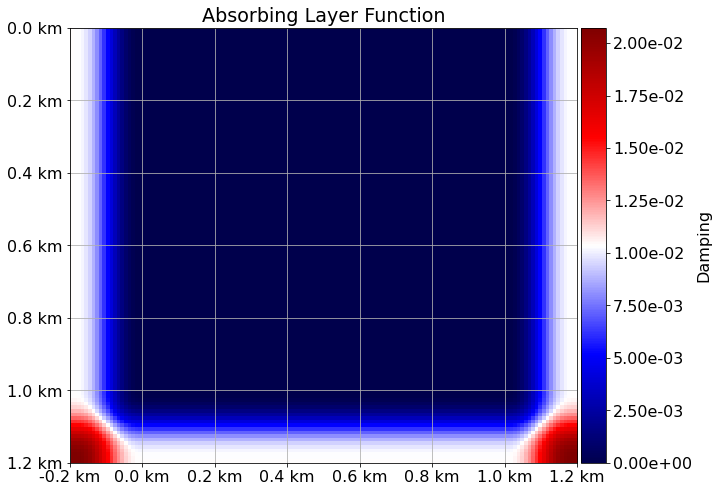

In [30]:
# NBVAL_IGNORE_OUTPUT

graph2damp(D0)

Like the velocity function $c(x,z)$, the damping function $\zeta(x,z)$ is constant in time. Therefore, the damping function will be a second-order *Function* in space, which uses points of the non-staggered type and which we will evaluate with the D0 array. The symbolic name *damp* will be assigned to this field.

In [31]:
damp = Function(name="damp",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
damp.data[:,:] = D0

The expressions for the acoustic equation with damping can be separeted between the white and blue regions.

Translating these expressions in terms of an *eq* that can be inserted in a Devito code, we have that in the white region the equation takes the form:

- eq1 = u.dt2 - vel0 * vel0 * u.laplace,

and in the blue region we have the following equation:

- eq2 = u.dt2 + vel0 * vel0 * damp * u.dtc - vel0 * vel0 * u.laplace.

Here *u.dtc* represents the centered derivative with respect to the variable $t$ for the field *u*. Then, we set the two pdes for the two regions


In [32]:
pde0 = Eq(u.dt2 - u.laplace*vel0**2)
pde1 = Eq(u.dt2 - u.laplace*vel0**2 + vel0**2*damp*u.dtc)

As we did on the notebook <a href="introduction.ipynb">Introduction to Acoustic Problem</a>, we define the *stencils* for each of the *pdes* that we created previously. In the case of *pde0* it is defined only in the white region, which is represented by *subdomain* *d0*. Then, we define the *stencil0* which resolves *pde0* in *d0* and it is defined as follows:

In [33]:
stencil0 =  Eq(u.forward, solve(pde0,u.forward),subdomain = grid.subdomains['d0'])

The *pde1* will be applied in the blue region, the union of the subdomains *d1*, *d2* and *d3*. In this way, we create a vector called *subds* that comprises these three *subdomains*, and we are ready to set the corresponding stencil

In [34]:
subds = ['d1','d2','d3']

In [35]:
stencil1 = [Eq(u.forward, solve(pde1,u.forward),subdomain = grid.subdomains[subds[i]]) for i in range(0,len(subds))]

The boundary conditions of the problem are kept the same as the notebook <a href="1_introduction.ipynb">Introduction to Acoustic Problem</a>. So these are placed in the term *bc* and have the following form:

In [36]:
bc  = [Eq(u[t+1,0,z],0.),Eq(u[t+1,nptx-1,z],0.),Eq(u[t+1,x,nptz-1],0.),Eq(u[t+1,x,0],u[t+1,x,1])]

We then define the operator (*op*) that join the acoustic equation, source term, boundary conditions and receivers.

- 1. The acoustic wave equation in the *d0* region: *[stencil0];*
- 2. The acoustic wave equation in the *d1*, *d2* and *d3* region: *[stencil1];*
- 3. Source term: *src_term;*
- 4. Boundary conditions: *bc;*
- 5. Receivers: *rec_term;*


In [37]:
# NBVAL_IGNORE_OUTPUT

op  = Operator([stencil0,stencil1] + src_term + bc + rec_term,subs=grid.spacing_map)

We reset the field *u*:

In [38]:
u.data[:] = 0.

We assign in *op* the number of time steps it must execute and the size of the time step in the local variables *time* and *dt*, respectively. 

In [39]:
# NBVAL_IGNORE_OUTPUT

op(time=nt,dt=dt0)

Operator `Kernel` run in 0.02 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.013632000000000042, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=3.799999999999999e-05, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=3.3e-05, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section3', rank=None),
                     PerfEntry(time=0.00027800000000000025, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section4', rank=None),
                     PerfEntry(time=0.0010460000000000092, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

To view the result of the displacement field at the end time, we use the *graph2d* routine given by:

In [40]:
def graph2d(U):    
    plot.figure()
    plot.figure(figsize=(16,8))
    fscale =  1/10**(3)
    scale  = np.amax(U[npmlx:-npmlx,0:-npmlz])/10.
    extent = [fscale*x0pml,fscale*x1pml,fscale*z1pml,fscale*z0pml]
    fig = plot.imshow(np.transpose(U[npmlx:-npmlx,0:-npmlz]),vmin=-scale, vmax=scale, cmap=cm.seismic, extent=extent)
    plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.axis('equal')
    plot.title('Map - Acoustic Problem with Devito')
    plot.grid()
    ax = plot.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plot.colorbar(fig, cax=cax, format='%.2e')
    cbar.set_label('Displacement [km]')
    plot.draw()
    plot.show()

<Figure size 576x432 with 0 Axes>

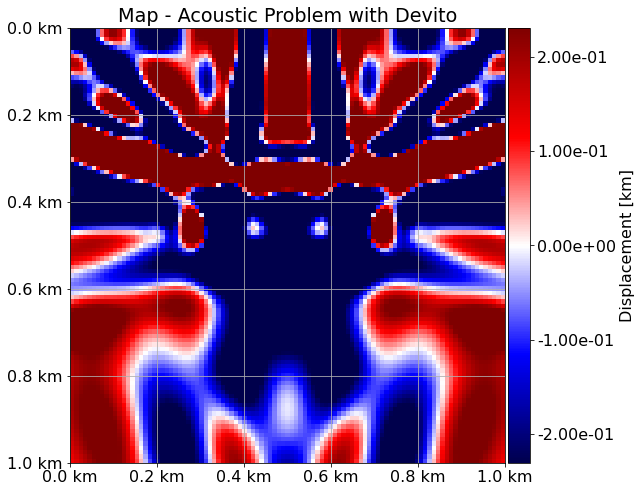

In [41]:
# NBVAL_IGNORE_OUTPUT

graph2d(u.data[0,:,:])

Note that the solution obtained here has a reduction in noise when compared to the results displayed on the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a>. To plot the result of the Receivers we use the *graph2drec* routine.

In [42]:
def graph2drec(rec):    
        plot.figure()
        plot.figure(figsize=(16,8))
        fscaled = 1/10**(3)
        fscalet = 1/10**(3)
        scale   = np.amax(rec[:,npmlx:-npmlx])/10.
        extent  = [fscaled*x0pml,fscaled*x1pml, fscalet*tn, fscalet*t0]
        fig = plot.imshow(rec[:,npmlx:-npmlx], vmin=-scale, vmax=scale, cmap=cm.seismic, extent=extent)
        plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
        plot.axis('equal')
        plot.title('Receivers Signal Profile with Damping - Devito')
        ax = plot.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plot.colorbar(fig, cax=cax, format='%.2e')
        plot.show()

<Figure size 576x432 with 0 Axes>

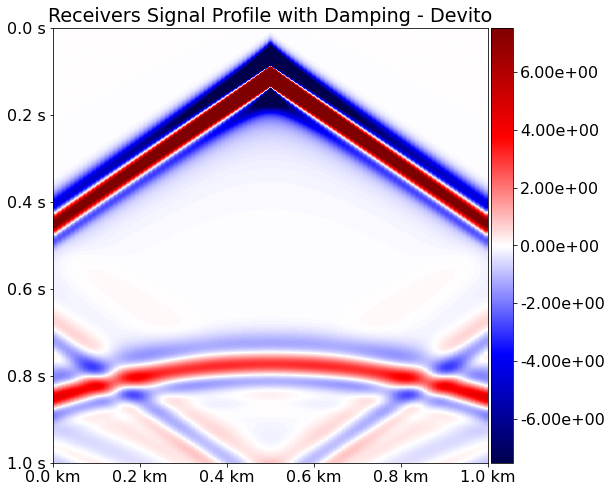

In [43]:
# NBVAL_IGNORE_OUTPUT

graph2drec(rec.data)

In [44]:
assert np.isclose(np.linalg.norm(rec.data), 990, rtol=1)

# 2.6 - Conclusions


- The damping strategy is a simple way to reduce artificial wave reflections coming from the computational boundaries, leading to a solution with less noise at the end of the simulation, when compared to the results of the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a>. However, the level of artificial reflections on the boundaries is still high. In the following notebooks we present methods which are more effective.

# 2.7 - Reference

- Sochaki, J., Kubichek, R., George, J., Fletcher, W.R. and Smithson, S. (1987). "Absorbing boundary conditions and surface waves," Geophysics, 52(1), 60-71. DOI: 10.1190/1.1442241. <a href="https://library.seg.org/doi/abs/10.1190/1.1442241">Reference Link.</a>